
# Lineer Regresyon [![Colab'de Aç](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kullaniciAdin/repoAdin/blob/ana_klasor/notebook.ipynb)


Bu notebook, basit bir lineer regresyon modelinin nasıl geliştirileceğini ve gradyan inişi algoritmasıyla nasıl eğitileceğini göstermektedir.

## Libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt

Bu kütüphaneler Basit bir Lineer Regresyon Modeli oluşturmak için yeterli olacaktır

## Veri Seti

###Bağımsız değişkenler(X)
-1 ile 1 arasında (1 hariç) 0.001 adım araklıları ile X değerleri oluşturma

In [33]:
X = np.arange(-1,1,0.001)
print(X)

[-1.    -0.999 -0.998 ...  0.997  0.998  0.999]


### Bağımlı değişkenler (y)
Bağımsız değişkenlerin(**X**) tabii tutlacağı fonksiyon:
**f(x) = 3x + gürültü**

In [30]:
def function(X):
    # Verilerimize rastgelelik katarak gerçekçi hale getiriyoruz.
    y = 3 * X + np.random.randn(len(X))
    return y

In [35]:
y = function(X)
print(y)

[-1.68048761 -3.42285313 -2.90076971 ...  0.45585964  4.18196478
  2.30328348]


### Veri seti inceleme

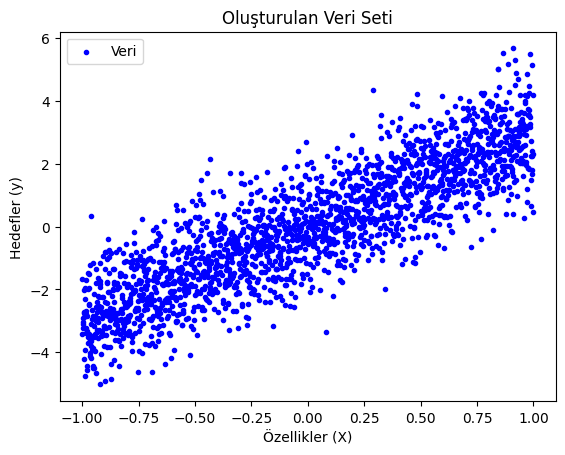

In [36]:
# Veriyi görselleştirelim
plt.scatter(X, y, color='blue', label='Veri', marker='.')
plt.xlabel('Özellikler (X)')
plt.ylabel('Hedefler (y)')
plt.legend()
plt.title('Oluşturulan Veri Seti')
plt.show()

## Lineer Regresyon Modeli

In [ ]:
# Model sınıfı oluşturuluyor
class LinearRegressionModel:
    def __init__(self):
        # Modelin başlangıç parametreleri rastgele atanır
        self.w = np.random.randn(1)  # Eğim
        self.b = np.random.randn(1)  # Sabit terim

    def predict(self, X):
        # Tahmin edilen y değeri hesaplanır
        return X * self.w + self.b

    def update_weights(self, X, y, lr=0.01):
        # Model ağırlıklarını gradyan inişi kullanarak günceller
        y_pred = self.predict(X)
        dw = np.mean(2 * (y_pred - y) * X)  # w için türev
        db = np.mean(2 * (y_pred - y))      # b için türev

        # Ağırlık güncellemesi
        self.w -= lr * dw
        self.b -= lr * db

## Model Eğitimi

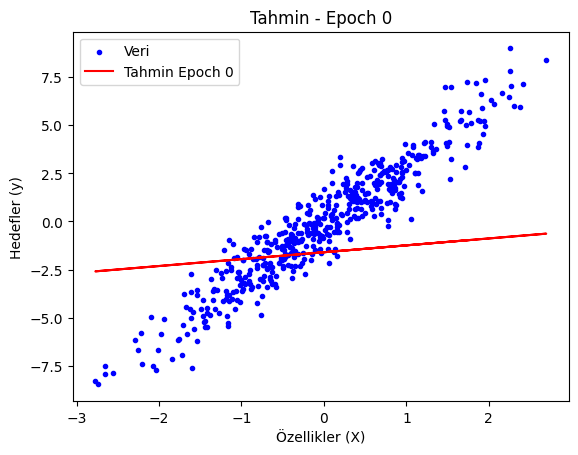

	Epoch 0, Loss: 9.85204018823885, w: [0.35858623], b: [-1.60153077]


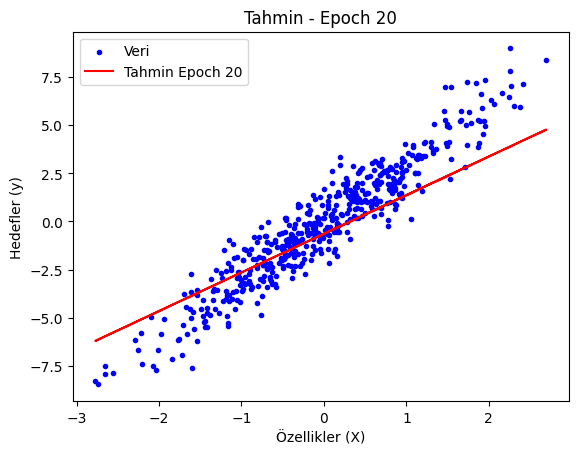

	Epoch 20, Loss: 2.1542230047038275, w: [2.0094973], b: [-0.64169242]


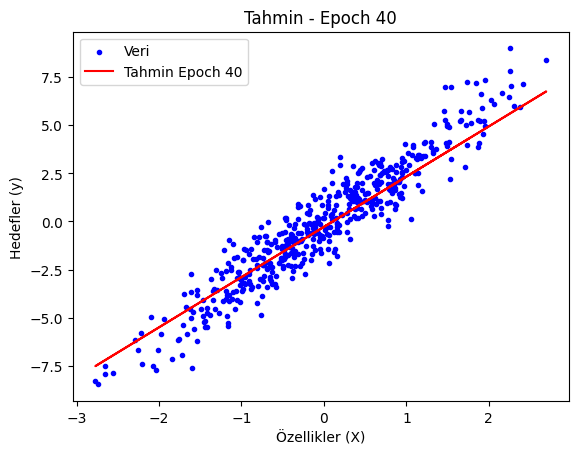

	Epoch 40, Loss: 1.1128159738829149, w: [2.61262141], b: [-0.28166646]


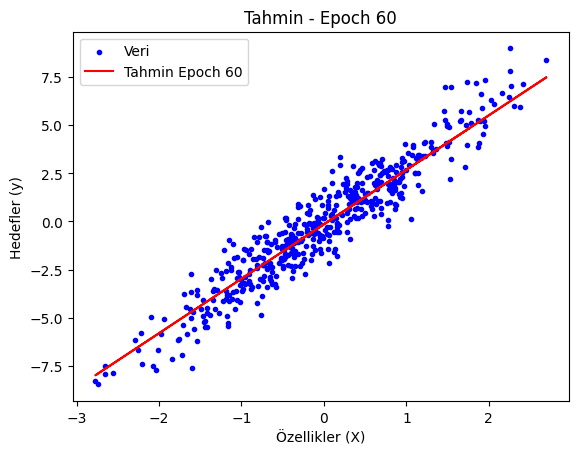

	Epoch 60, Loss: 0.9718562498629624, w: [2.83304936], b: [-0.14677871]


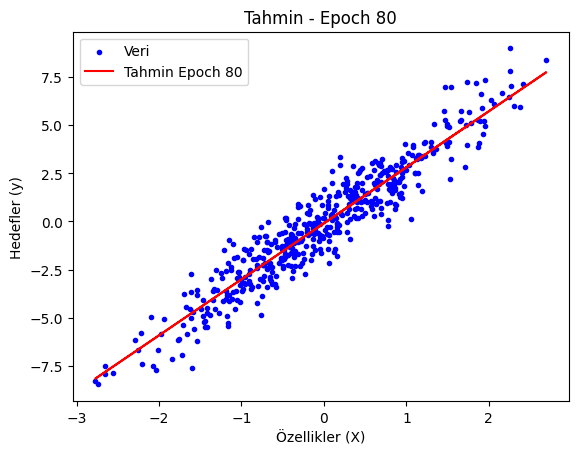

	Epoch 80, Loss: 0.9527678013849871, w: [2.91364238], b: [-0.09629458]


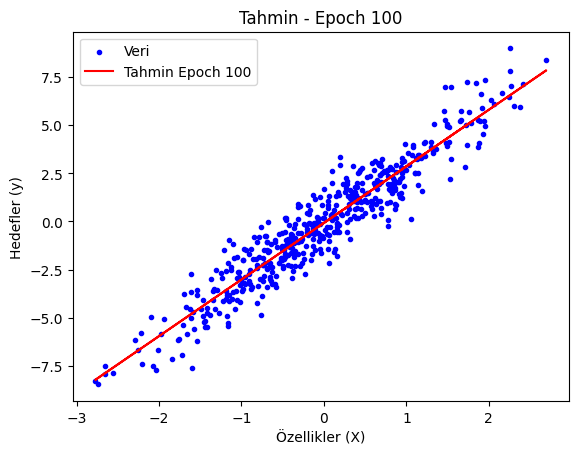

	Epoch 100, Loss: 0.9501818018391708, w: [2.94312003], b: [-0.07741827]


In [ ]:
model = LinearRegressionModel()
epochs = 100
learning_rate = 0.025
losses = []

# Modelin öğrenme süreci ve kayıpların görselleştirilmesi
for epoch in range(epochs + 1):
    model.update_weights(X, y, lr=learning_rate)
    loss = np.mean((model.predict(X) - y) ** 2)
    losses.append(loss)

    # Belirli epochlarda tahmin çizgisi çizelim
    if epoch % 20 == 0:
        plt.scatter(X, y, color='blue', label='Veri', marker='.')
        plt.plot(X, model.predict(X), color='red', label=f'Tahmin Epoch {epoch}')
        plt.xlabel('Özellikler (X)')
        plt.ylabel('Hedefler (y)')
        plt.legend()
        plt.title(f'Tahmin - Epoch {epoch}')
        plt.show()
        print(f"\tEpoch {epoch}, Loss: {loss}, w: {model.w}, b: {model.b}")

## Kayıp Fonksiyonunun Görselleştirilmesi

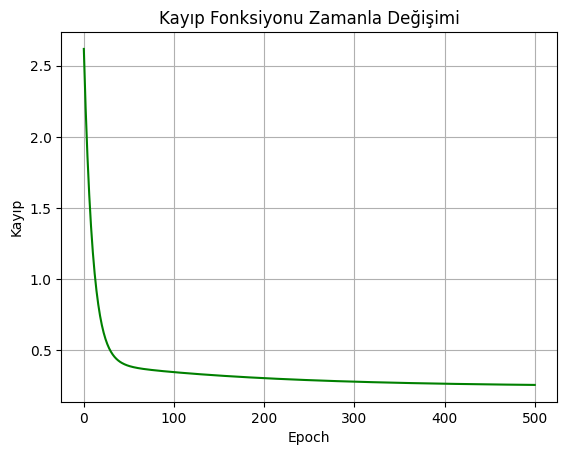

In [ ]:
# Kayıp fonksiyonunun zamanla değişimi
plt.plot(range(epochs + 1), losses, color='green')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Kayıp Fonksiyonu Zamanla Değişimi')
plt.grid(True)
plt.show()

## Sonuçlar
Modelimizin veri setine uydurduğu fonksiyonun eğimi ile bağımsız değişkenlerden bağımlı değişkenlere uygulanan fonksiyonun(**f(x) = 3x + gürültü**) eğimi aynı mı?

In [ ]:
print(f"Modelin öğrenme süreci sonrası eğim (w): {model.w}")
print(f"Modelin öğrenme süreci sonrası sabit terim (b): {model.b}")

Modelin öğrenme süreci sonrası eğim (w): [2.96013459]
Modelin öğrenme süreci sonrası sabit terim (b): [-0.06616974]


Modelimizin veri setine uydurduğu lineer fonksiyon : **f(X) = 2.960 * X - 0.066**

Bu fonksiyonun eğimi(**2.960**) 3'e oldukça yakın. Bu demek oluyor ki modelimiz başarı ile çalışıyor...

**Bu Jupyter Notebook'ta, basit bir lineer regresyon modeli geliştirdik.**

- Model, rastgele atanmış parametrelerle başlar ve gradyan inişi kullanarak hata fonksiyonunu minimize etmeye çalışır.
- Gradyan inişi, her epoch'ta parametreleri türevler aracılığıyla güncelleyerek, modelin eğimini ve sabit terimini optimum değerlere taşır.
- Kayıp fonksiyonunun zamanla azalması, modelin öğrenme sürecinin başarılı olduğunu ve veriye uygun hale geldiğini gösterir.



Bu temel implementasyon, farklı gradyan inişi yöntemleri, öğrenme oranı optimizasyonu ve veri işleme teknikleri eklenerek geliştirilebilir.
Ayrıca, daha büyük veri setleri veya çoklu özelliklerle çalışmak için bu modelin genişletilmesi de mümkündür.